# Image to data file

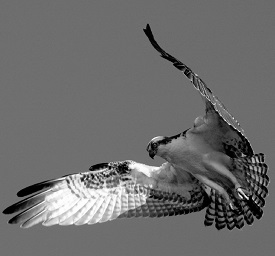

In [ ]:
from PIL import Image
import numpy as np
from scipy.signal import convolve2d as convolve2d
img = Image.open("in1.jpg").convert("L")
display(img)

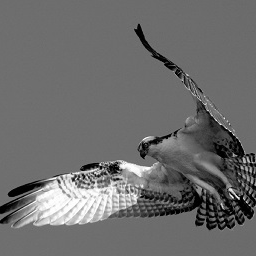

In [ ]:
bitnum = 8

ratio = (2**bitnum) / min(img.size)
width = int(img.size[0] * ratio)
height = int(img.size[1] * ratio)
img_resized = img.resize((width, height))

center_x = int(img_resized.size[0] / 2)
center_y = int(img_resized.size[1] / 2)
halfdim = 2**(bitnum-1)
box = (center_x - halfdim, center_y - halfdim, center_x + halfdim, center_y + halfdim)
img_cropped = img_resized.crop(box)
display(img_cropped)

data = np.array(img_cropped).astype(np.uint16)
np.savetxt("in1.txt", data, fmt="%X", delimiter="\n")

In [ ]:
gx = convolve2d([
    [1, 0, -1],
    [2, 0, -2],
    [1, 0, -1]
], data, mode="valid")
gy = convolve2d([
    [+1, +2, +1],
    [ 0,  0,  0],
    [-1, -2, -1]
], data, mode="valid")

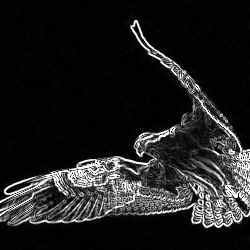

In [ ]:
gout = np.right_shift(np.abs(gx), 1) + np.right_shift(np.abs(gy), 1)
np.putmask(gout, gout > 255, 255)
cropped = gout[2:-2,2:-2]
Image.fromarray((cropped).astype(np.uint8))

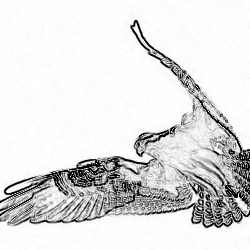

In [ ]:
Image.fromarray((255 - cropped).astype(np.uint8))

# Data file to image

In [ ]:
from PIL import Image
import numpy as np

bitnum = 8
dimension = 2**bitnum

data = np.loadtxt("output.txt", dtype=np.uint8, delimiter="\n", comments="//", converters={0: lambda s: 0 if (s == b'xx') else int(s.strip(), 16)})
data.resize((dimension, dimension))

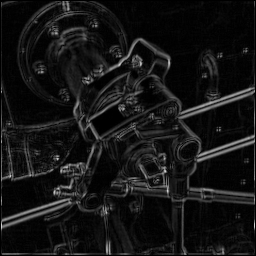

In [ ]:
Image.fromarray((data).astype(np.uint8))